## Summary

In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = r'./data/' # use your path
all_csv = glob.glob(os.path.join(path, "*.csv"))

tweets = []

for filename in all_csv:
    df = pd.read_csv(filename, index_col=None, header=0)
    tweets.append(df)
    
tweets_df = pd.concat(tweets, axis=0, ignore_index=True)
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6791,287,1331415484059840512,#30DayMapChallenge - Day 23 - Elevation\n\nA m...,en,2020-11-25 01:52:42,1,3,"[{'text': '30DayMapChallenge', 'indices': [0, ...",867502710131752960,Vivek Parashar,vivekparasharr,NaN,14,24,http://pbs.twimg.com/media/EnojUtcW4AMI3t0.jpg,https://twitter.com/twitter/statuses/133141548...
6792,288,1331401862772367361,"Very rusty, but here's a rough slice of data f...",en,2020-11-25 00:58:34,1,6,"[{'text': '30DayMapChallenge', 'indices': [131...",12329722,Alex Yule 🤘🏼,yuletide,San Francisco via New England,1575,843,http://pbs.twimg.com/media/EnoWLlrXcAAndus.jpg,https://twitter.com/twitter/statuses/133140186...
6793,289,1331395322476687363,"Puerto Vallarta, México \n#30DayMapChallenge 2...",es,2020-11-25 00:32:35,2,1,"[{'text': '30DayMapChallenge', 'indices': [25,...",890753654822588417,Yaireth Ortiz,Yaireth_Ortiz,NaN,12,348,http://pbs.twimg.com/media/EnoQ-cJW8AAmfxG.jpg,https://twitter.com/twitter/statuses/133139532...
6794,290,1331388403485696001,#30daymapchallenge Day 24 Elevation\n\nMap of ...,en,2020-11-25 00:05:06,1,3,"[{'text': '30daymapchallenge', 'indices': [0, ...",910889225448439808,Dennis Kao,professorkao,NaN,131,248,http://pbs.twimg.com/media/EnoJ4inW8AA-lgL.jpg,https://twitter.com/twitter/statuses/133138840...


In [3]:
tweets_df['date'] = tweets_df['tweet_created_at'].str[:10]

In [4]:
tweets_df

,Unnamed: 0,tweet_id,tweet_text,language,tweet_created_at,retweet,favorite,hashtags,user_id,user_name,user,user_loc,user_follower,friends_count,media,tweet_url,date
0,1173,1323051948485070853,Este mes estaré participando en el #30DayMapCh...,es,2020-11-01 23:59:00,1,10,"[{'text': '30DayMapChallenge', 'indices': [35,...",1002117891133755392,José Molano-Pulido,JoseFMolano,NaN,261,437,http://pbs.twimg.com/media/ElxsT-SWkAAhiSj.png,https://t.co/Qw7z5xS2Qh,2020-11-01
1,1176,1323046291367100416,Antes de que acabe el día. Uno de mis primero...,es,2020-11-01 23:36:31,16,72,"[{'text': '30DayMapChallenge', 'indices': [83,...",384907052,Leticia Luna,Letyludigital,México,1121,2447,http://pbs.twimg.com/media/ElxnlwaVcAEq9yb.jpg,https://t.co/KXhtzKjh2e,2020-11-01
2,1177,1323043516629614595,We'll see if I stick with this #30DayMapChalle...,en,2020-11-01 23:25:29,2,15,"[{'text': '30DayMapChallenge', 'indices': [31,...",704329847896678400,Ross Thorn,RealRossThorn,Minnesota,323,482,http://pbs.twimg.com/media/Elxk6HSXEBg-O8d.jpg,https://t.co/QGuHH8qogZ,2020-11-01
3,1178,1323042272146034689,Day 1 of #30DayMapChallenge - Points\n\nQuickl...,en,2020-11-01 23:20:33,3,11,"[{'text': '30DayMapChallenge', 'indices': [9, ...",863722747,Tim Rodaway,TimRodaway,"Newcastle Upon Tyne, England",94,283,http://pbs.twimg.com/media/ElxjSlZW0AIxSnq.jpg,https://t.co/yPIDpPpSIJ,2020-11-01
4,1179,1323042145255698449,#30DayMapChallenge day 1 Points\nFirst attempt...,en,2020-11-01 23:20:03,1,2,"[{'text': '30DayMapChallenge', 'indices': [0, ...",3641471067,Bert H,BertrandHoud,"Auvergne, France",64,259,http://pbs.twimg.com/media/ElxjxjNXUAAVWUC.jpg,https://t.co/0hCmCUWb5a,2020-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6791,287,1331415484059840512,#30DayMapChallenge - Day 23 - Elevation\n\nA m...,en,2020-11-25 01:52:42,1,3,"[{'text': '30DayMapChallenge', 'indices': [0, ...",867502710131752960,Vivek Parashar,vivekparasharr,NaN,14,24,http://pbs.twimg.com/media/EnojUtcW4AMI3t0.jpg,https://twitter.com/twitter/statuses/133141548...,2020-11-25
6792,288,1331401862772367361,"Very rusty, but here's a rough slice of data f...",en,2020-11-25 00:58:34,1,6,"[{'text': '30DayMapChallenge', 'indices': [131...",12329722,Alex Yule 🤘🏼,yuletide,San Francisco via New England,1575,843,http://pbs.twimg.com/media/EnoWLlrXcAAndus.jpg,https://twitter.com/twitter/statuses/133140186...,2020-11-25
6793,289,1331395322476687363,"Puerto Vallarta, México \n#30DayMapChallenge 2...",es,2020-11-25 00:32:35,2,1,"[{'text': '30DayMapChallenge', 'indices': [25,...",890753654822588417,Yaireth Ortiz,Yaireth_Ortiz,NaN,12,348,http://pbs.twimg.com/media/EnoQ-cJW8AAmfxG.jpg,https://twitter.com/twitter/statuses/133139532...,2020-11-25
6794,290,1331388403485696001,#30daymapchallenge Day 24 Elevation\n\nMap of ...,en,2020-11-25 00:05:06,1,3,"[{'text': '30daymapchallenge', 'indices': [0, ...",910889225448439808,Dennis Kao,professorkao,NaN,131,248,http://pbs.twimg.com/media/EnoJ4inW8AA-lgL.jpg,https://twitter.com/twitter/statuses/133138840...,2020-11-25


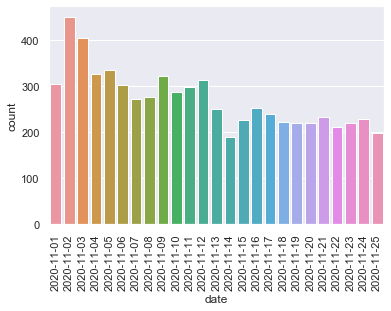

In [5]:
sns.set_theme()

sns.countplot(x="date", data=tweets_df)
plt.xticks(rotation=90)

plt.savefig("./graphs/maps_count.png", bbox_inches = 'tight')